In [1]:
import numpy as np
import pandas as pd
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from regressors import stats
from sklearn.tree import plot_tree

In [2]:
#Q1:How many observations (rows) and how many variables (columns) are there in the raw data?
#Q2:Produce a table of variables showing their types.
#Load data
#Rename columns

import pandas as pd
data = pd.read_csv('D:\喵\9.ITOM 6267 Data Mining\Exploratory Data Analysis of Adult and Income Prediction/adult.csv', header = None)
data.rename(columns={0: 'age', 1: 'workclass', 2: 'fnlwgt',3: 'education',4: 'education_num',5: 'marital_status',
                    6: 'occupation',7: 'relationship', 8: 'race', 9: 'sex', 10: 'capital_gain',
                    11: 'capital_loss', 12: 'hours_per_week', 13: 'native_country', 14: 'income',}, inplace=True)
data.info()
#Our initial data has 32561 rows and 15 columns
#Data types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
#Rescale fnlwgt
data['fnlwgt'] = data['fnlwgt']/1000
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77.516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83.311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215.646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234.721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338.409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#Re-index using fnlwgt
data = data.reindex(data.index.repeat(data['fnlwgt']))
data.info()
#Our uncompressed data has 6162973 rows and 15 columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6162973 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   age             int64  
 1   workclass       object 
 2   fnlwgt          float64
 3   education       object 
 4   education_num   int64  
 5   marital_status  object 
 6   occupation      object 
 7   relationship    object 
 8   race            object 
 9   sex             object 
 10  capital_gain    int64  
 11  capital_loss    int64  
 12  hours_per_week  int64  
 13  native_country  object 
 14  income          object 
dtypes: float64(1), int64(5), object(9)
memory usage: 752.3+ MB


In [5]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77.516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,39,State-gov,77.516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,39,State-gov,77.516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,39,State-gov,77.516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,39,State-gov,77.516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [6]:
#Q3:Some of the variables appear to be numeric but should be treated as categorical. Your best clue is whether a variable has only a few discrete values. 
#Which numeric variables should be treated as categorical?

#Numeric and categorical variables
numvars = data[['age','education_num', 'capital_gain','capital_loss','hours_per_week'] ]
catvars = data[['workclass', 'education','marital_status','occupation','relationship','race','sex','native_country','income']] 
print(numvars.nunique())


age                73
education_num      16
capital_gain      119
capital_loss       92
hours_per_week     94
dtype: int64


In [7]:
#education-num should be categorical
numvars = data[['age', 'capital_gain','capital_loss','hours_per_week'] ]
catvars = data[['workclass', 'education','education_num','marital_status','occupation','relationship','race','sex','native_country','income']]

In [20]:
#Q4:For numeric variables, produce a table of statistics including missing values, min, max, median, mean, standard deviation, skewness and kurtosis.
#Summary statistics for numeric variables
numvars.agg(['min','max','median','mean', 'std', 'skew', 'kurtosis'])

,age,capital_gain,capital_loss,hours_per_week
min,17.000000,0.000000,0.000000,1.000000
max,90.000000,99999.000000,4356.000000,99.000000
median,36.000000,0.000000,0.000000,40.000000
mean,37.998747,1079.458664,84.996631,40.308394
std,13.467073,7433.460583,396.780377,12.096082
skew,0.594816,11.911920,4.643957,0.204107
kurtosis,-0.121270,153.291767,20.791694,2.982965


In [21]:
#count missing values
missing = numvars.isnull().sum()
missing
#no missing values

age               0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

In [24]:
#Q5:How many outliers are present in each numeric variable? Show the tallies in a table. Set them to missing.
#Quartile calculations
Q1 = numvars.quantile(0.25)
Q3 = numvars.quantile(0.75)
IQR = Q3 - Q1

#Count of outliers for each numeric variable
((numvars < (Q1 - 1.5 * IQR)) | (numvars > (Q3 + 1.5 * IQR))).sum()

#Imputing too many outliers will distort our data for numerical variables, so we don't do it

age                 26648
capital_gain       508705
capital_loss       280984
hours_per_week    1661925
dtype: int64

In [25]:
#Q6:Count the unique values of each categorical variable, including missing values. Are there any unusual values in any of the categorical variables?
#Count the unique values of each categorical variable
workclass = data['workclass'].value_counts(sort=True)
education = data['education'].value_counts(sort=True)
education_num = data['education_num'].value_counts(sort=True)
marital_status = data['marital_status'].value_counts(sort=True)
occupation = data['occupation'].value_counts(sort=True)
relationship = data['relationship'].value_counts(sort=True)
race = data['race'].value_counts(sort=True)
sex = data['sex'].value_counts(sort=True)
native_country = data['native_country'].value_counts(sort=True)

print(workclass)
print(education)
print(education_num)
print(marital_status)
print(occupation)
print(relationship)
print(race)
print(sex)
print(native_country)

 Private             4363545
 Self-emp-not-inc     444963
 Local-gov            393760
 ?                    345183
 State-gov            238352
 Self-emp-inc         195828
 Federal-gov          177330
 Without-pay            2433
 Never-worked           1579
Name: workclass, dtype: int64
 HS-grad         1985071
 Some-college    1372414
 Bachelors       1004341
 Masters          309031
 Assoc-voc        250731
 11th             228447
 Assoc-acdm       205850
 10th             183186
 7th-8th          121178
 Prof-school      106661
 9th              103822
 12th              85998
 5th-6th           77230
 Doctorate         76897
 1st-4th           40111
 Preschool         12005
Name: education, dtype: int64
9     1985071
10    1372414
13    1004341
14     309031
11     250731
7      228447
12     205850
6      183186
4      121178
15     106661
5      103822
8       85998
3       77230
16      76897
2       40111
1       12005
Name: education_num, dtype: int64
 Married-civ-spouse  

In [8]:
#Q7:Impute the missing values. Be sure to explain how you did that in your presentation.
carmissing = catvars.isnull().sum()
carmissing
# no missing value

workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

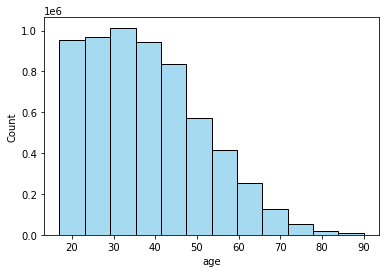

In [9]:
#Q8:Produce a histogram or boxplot for each of the numeric variables.
#Distribution of Numeric variables
import seaborn as sns
import matplotlib.pyplot as plt

figsize=(5, 5)

#Q8 Age Histogram
sns.histplot(data=numvars, x="age", color="skyblue", bins = 12)


<AxesSubplot:title={'center':'Boxplot of age'}>

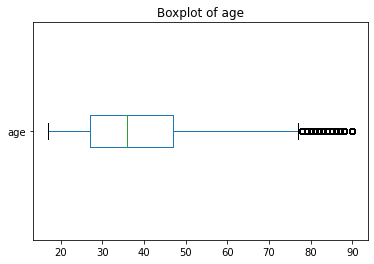

In [10]:
data.age.plot.box(title="Boxplot of age",vert=False)

<AxesSubplot:xlabel='capital_gain', ylabel='Count'>

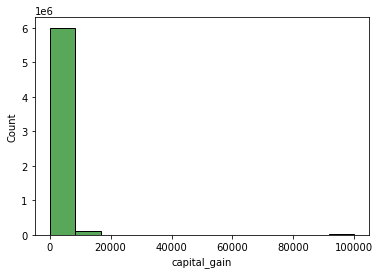

In [11]:
#Q8 Capital Gain Histogram
sns.histplot(data=numvars, x="capital_gain", color="forestgreen", bins = 12)
#sparse data will not add any information to our analysis

<AxesSubplot:title={'center':'Boxplot of capital_gain'}>

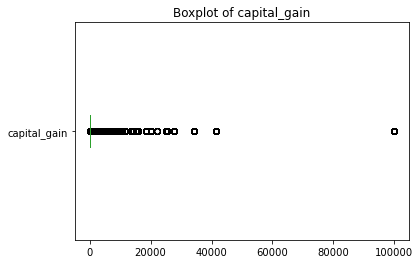

In [12]:
data.capital_gain.plot.box(title="Boxplot of capital_gain",vert=False)

<AxesSubplot:xlabel='capital_loss', ylabel='Count'>

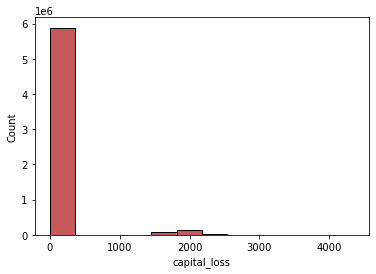

In [13]:
#Q8 Capital Loss Histogram
sns.histplot(data=numvars, x="capital_loss", color="firebrick", bins = 12)
#sparse data will not add any information to our analysis

<AxesSubplot:title={'center':'Boxplot of capital_loss'}>

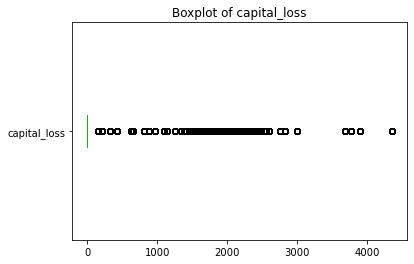

In [14]:
data.capital_loss.plot.box(title="Boxplot of capital_loss",vert=False)

<AxesSubplot:xlabel='hours_per_week', ylabel='Count'>

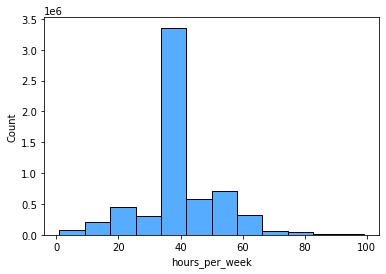

In [15]:
#Q8 Hours per Week Histogram
sns.histplot(data=numvars, x="hours_per_week", color="dodgerblue", bins = 12)

<AxesSubplot:title={'center':'Boxplot of hours_per_week'}>

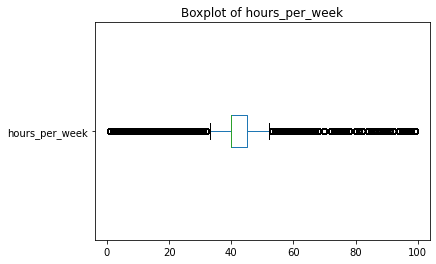

In [16]:
data.hours_per_week.plot.box(title="Boxplot of hours_per_week",vert=False)

In [17]:
#impute ? with most frequent observation
data['workclass'] = data['workclass'].replace(' ?',np.nan)
data['occupation'] = data['occupation'].replace(' ?',np.nan)

data.dropna(how='any',inplace=True)

<AxesSubplot:>

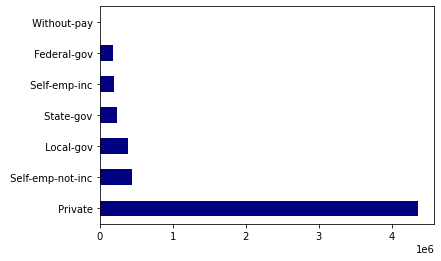

In [18]:
#Q9:Produce a bar chart for each of the categorical variables showing the counts for each unique value.
# Workclass 
data['workclass'].value_counts().plot(kind='barh', color = "navy")

<AxesSubplot:>

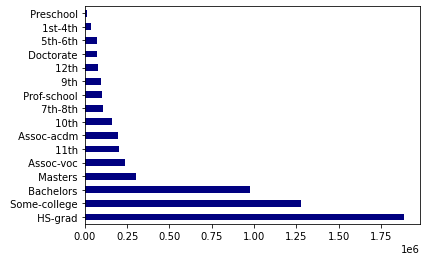

In [19]:
#Q9 Education
data['education'].value_counts().plot(kind='barh', color = "navy")

<AxesSubplot:>

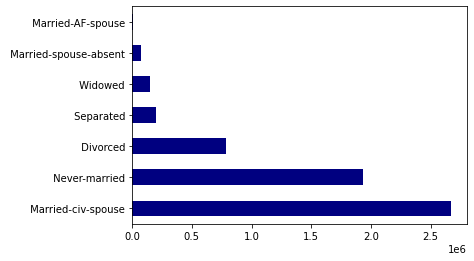

In [20]:
#Q9 Marital Status
data['marital_status'].value_counts().plot(kind='barh', color = "navy")

<AxesSubplot:>

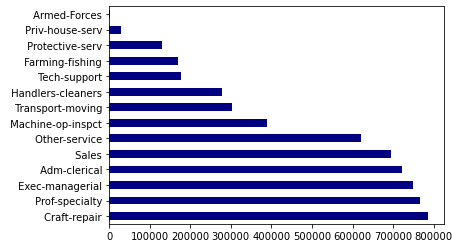

In [21]:
#Q9 Occupation
data['occupation'].value_counts().plot(kind='barh', color = "navy")

<AxesSubplot:>

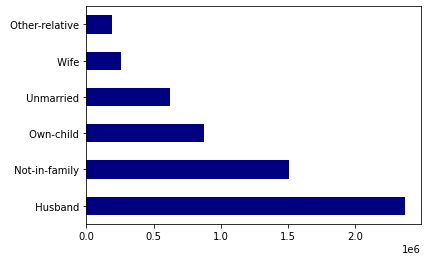

In [22]:
#Q9 Relationship
data['relationship'].value_counts().plot(kind='barh', color = "navy")

<AxesSubplot:>

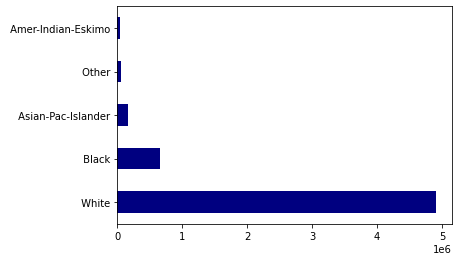

In [23]:
#Q9 Race
data['race'].value_counts().plot(kind='barh', color = "navy")

<AxesSubplot:>

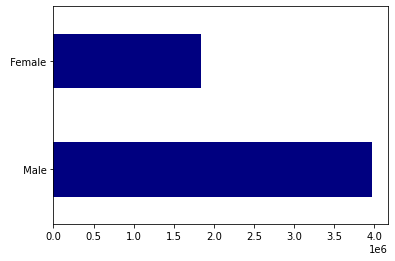

In [24]:
#Q9 Sex
data['sex'].value_counts().plot(kind='barh', color = "navy")

In [25]:
#turn categorical data into numerical data prior to modeling
for col in catvars:
    b, c = np.unique(data[col], return_inverse=True) 
    data[col] = c

data.tail(10)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32560,52,3,287.927,11,8,2,3,5,4,0,15024,0,40,39,1
32560,52,3,287.927,11,8,2,3,5,4,0,15024,0,40,39,1
32560,52,3,287.927,11,8,2,3,5,4,0,15024,0,40,39,1
32560,52,3,287.927,11,8,2,3,5,4,0,15024,0,40,39,1
32560,52,3,287.927,11,8,2,3,5,4,0,15024,0,40,39,1
32560,52,3,287.927,11,8,2,3,5,4,0,15024,0,40,39,1
32560,52,3,287.927,11,8,2,3,5,4,0,15024,0,40,39,1
32560,52,3,287.927,11,8,2,3,5,4,0,15024,0,40,39,1
32560,52,3,287.927,11,8,2,3,5,4,0,15024,0,40,39,1
32560,52,3,287.927,11,8,2,3,5,4,0,15024,0,40,39,1


In [26]:
#Remove irrelevant features prior to modeling
from scipy.stats import pointbiserialr, spearmanr
col_names = data.columns

param=[]
correlation=[]
abs_corr=[]

for c in col_names:
    #Check if binary or continuous
    if c != "income":
        if len(data[c].unique()) <= 2:
            corr = spearmanr(data['income'],data[c])[0]
        else:
            corr = pointbiserialr(data['income'],data[c])[0]
        param.append(c)
        correlation.append(corr)
        abs_corr.append(abs(corr))

#Create dataframe for visualization
param_df=pd.DataFrame({'correlation':correlation,'parameter':param, 'abs_corr':abs_corr})

#Sort by absolute correlation
param_df=param_df.sort_values(by=['abs_corr'], ascending=False)

#Set parameter name as index
param_df=param_df.set_index('parameter')

param_df

,correlation,abs_corr
parameter,,
education_num,0.339861,0.339861
relationship,-0.257962,0.257962
age,0.252128,0.252128
hours_per_week,0.237258,0.237258
capital_gain,0.222643,0.222643
sex,0.212179,0.212179
marital_status,-0.202624,0.202624
capital_loss,0.154716,0.154716
education,0.087855,0.087855


In [27]:
best_features=param_df.index[0:4].values
print('Best features:\t', best_features)

Best features:	 ['education_num' 'relationship' 'age' 'hours_per_week']


In [32]:
#identify predictors and target variable
X = data.drop(['income','capital_gain','sex','marital_status','capital_loss','education','race','occupation','native_country','workclass','fnlwgt'], axis=1)

y = data['income']
#Splitting the Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#check the shape of X_train and X_test
X_train.shape, X_test.shape

((4071347, 4), (1744864, 4))

In [35]:
#Q10.1: Naïve Bayes Model
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
predicted_probas = gnb.predict_proba(X_test)

Confusion matrix

 [[1206120  107757]
 [ 226777  204210]]

True Positives(TP1) =  1206120

True Negatives(TN1) =  204210

False Positives(FP1) =  107757

False Negatives(FN1) =  226777


<AxesSubplot:>

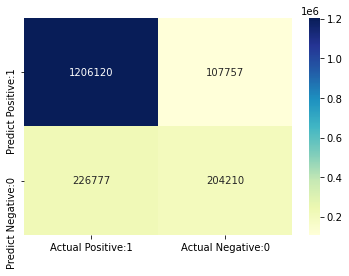

In [36]:
#Q10.2: Naïve Bayes Model Confusion Table
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm1 = confusion_matrix(y_test, y_pred)

TP1 = cm1[0,0]
TN1 = cm1[1,1]
FP1 = cm1[0,1]
FN1 = cm1[1,0]


print('Confusion matrix\n\n', cm1)

print('\nTrue Positives(TP1) = ', cm1[0,0])

print('\nTrue Negatives(TN1) = ', cm1[1,1])

print('\nFalse Positives(FP1) = ', cm1[0,1])

print('\nFalse Negatives(FN1) = ', cm1[1,0])

cm1_matrix = pd.DataFrame(data=cm1, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm1_matrix, annot=True, fmt='d', cmap='YlGnBu')

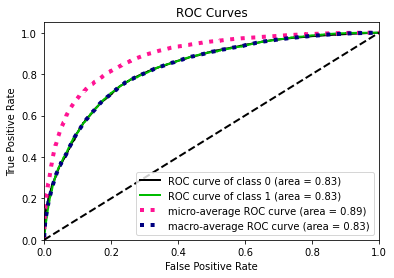

In [37]:
#Q10.2: Naïve Bayes Model ROC Curve

import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, predicted_probas)
plt.show()

In [38]:
#Q10.2: Naïve Bayes Model ROC-AUC
from sklearn.metrics import roc_auc_score

ROC_AUC1 = roc_auc_score(y_test, predicted_probas[:,1])

print('ROC AUC (Naive Bayes Model) : {:.4f}'.format(ROC_AUC1))

ROC AUC (Naive Bayes Model) : 0.8298


In [39]:
#Q10.3: Naïve Bayes Model Metrics
from sklearn.metrics import accuracy_score

misclassification = (FP1 + FN1)/float(TP1 + TN1 + FP1 + FN1)
true_positive_rate = TP1 / float(TP1 + FN1)
false_positive_rate = FP1 / float(FP1 + TN1)
specificity = TN1 / (TN1 + FP1)
precision = TP1 / float(TP1 + FP1)
prevalence = (TP1 + FN1)/float(TP1 + TN1 + FP1 + FN1)
print('Naïve Bayes Model Metrics:')
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Misclassification Rate : {0:0.4f}'.format(misclassification))
print('Precision : {0:0.4f}'.format(precision))
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
print('Specificity : {0:0.4f}'.format(specificity))
print('Prevalence : {0:0.4f}'.format(prevalence))
print('ROC AUC (Naive Bayes Model) : {:.4f}'.format(ROC_AUC1))

Naïve Bayes Model Metrics:
Model accuracy score: 0.8083
Misclassification Rate : 0.1917
Precision : 0.9180
True Positive Rate : 0.8417
False Positive Rate : 0.3454
Specificity : 0.6546
Prevalence : 0.8212
ROC AUC (Naive Bayes Model) : 0.8298


In [40]:
#Q11.1: Logit Model
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver = 'liblinear')
log.fit(X_train, y_train)

y_pred_log = log.predict(X_test)
y_train_score_log = log.predict(X_train)

In [41]:
#Q11.2: Hypothesis testing
from regressors import stats
PVal = stats.coef_pval(log, X, y)
Coeff = log.coef_
PVal = PVal[1:]
PVal.shape
X_Columns = X.columns
d = {'Variable':X_Columns, 'P Value':PVal}
Summary = pd.DataFrame(d)
Summary_Sig = Summary[Summary['P Value'] < 0.05]
Summary_Sig

,Variable,P Value
0,age,0.0
1,education_num,0.0
2,relationship,0.0
3,hours_per_week,0.0


Confusion matrix

 [[1226433   87444]
 [ 262257  168730]]

True Positives(TP2) =  1226433

True Negatives(TN2) =  168730

False Positives(FP2) =  87444

False Negatives(FN2) =  262257


<AxesSubplot:>

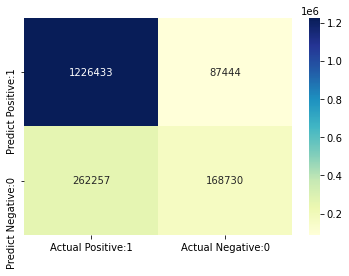

In [43]:
#Q11.3 Logit Model Confusion Table
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm2 = confusion_matrix(y_test, y_pred_log)

TP2 = cm2[0,0]
TN2 = cm2[1,1]
FP2 = cm2[0,1]
FN2 = cm2[1,0]

print('Confusion matrix\n\n', cm2)

print('\nTrue Positives(TP2) = ', cm2[0,0])

print('\nTrue Negatives(TN2) = ', cm2[1,1])

print('\nFalse Positives(FP2) = ', cm2[0,1])

print('\nFalse Negatives(FN2) = ', cm2[1,0])

cm2_matrix = pd.DataFrame(data=cm2, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm2_matrix, annot=True, fmt='d', cmap='YlGnBu')

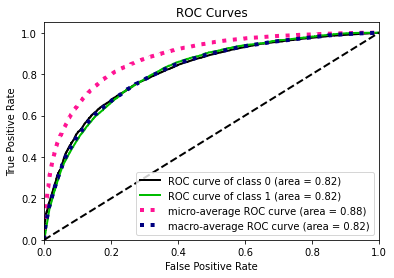

In [44]:
#Q11.3 Logit Model ROC Curve
import matplotlib.pyplot as plt
import scikitplot as skplt

predicted_probas2 = log.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, predicted_probas2)
plt.show()

In [45]:
#Q11.3 Logit Model ROC-AUC

ROC_AUC2 = roc_auc_score(y_test, predicted_probas2[:,1])

print('ROC AUC (Logit Model) : {:.4f}'.format(ROC_AUC2))

ROC AUC (Logit Model) : 0.8150


In [46]:
#Q11.4: Logit Model Metrics
from sklearn.metrics import accuracy_score

misclassification2 = (FP2 + FN2)/float(TP2 + TN2 + FP2 + FN2)
true_positive_rate2 = TP2 / float(TP2 + FN2)
false_positive_rate2 = FP2 / float(FP2 + TN2)
specificity2 = TN2 / (TN2 + FP2)
precision2 = TP2 / float(TP2 + FP2)
prevalence2 = (TP2 + FN2)/float(TP2 + TN2 + FP2 + FN2)

print('Logit Model Metrics:')
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_log)))
print('Misclassification Rate : {0:0.4f}'.format(misclassification2))
print('Precision : {0:0.4f}'.format(precision2))
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate2))
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate2))
print('Specificity : {0:0.4f}'.format(specificity2))
print('Prevalence : {0:0.4f}'.format(prevalence2))
print('ROC AUC (Logit Model) : {:.4f}'.format(ROC_AUC2))

Logit Model Metrics:
Model accuracy score: 0.7996
Misclassification Rate : 0.2004
Precision : 0.9334
True Positive Rate : 0.8238
False Positive Rate : 0.3413
Specificity : 0.6587
Prevalence : 0.8532
ROC AUC (Logit Model) : 0.8150


In [61]:
#Q12.1: Tree Model (CART)
#Decision Tree

from sklearn import tree
tree1 = tree.DecisionTreeClassifier(max_depth=3)
tree1.fit(X_train, y_train)

y_pred_dt = tree1.predict(X_test)
y_train_score_dt = tree1.predict(X_train)

In [51]:
#Q12.1: Tree Model (CART)
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, max_depth = 7)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_train_score_rf = rf.predict(X_train)

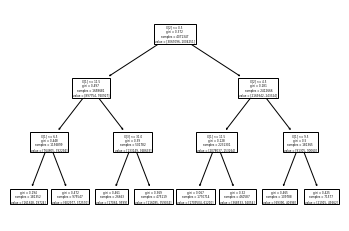

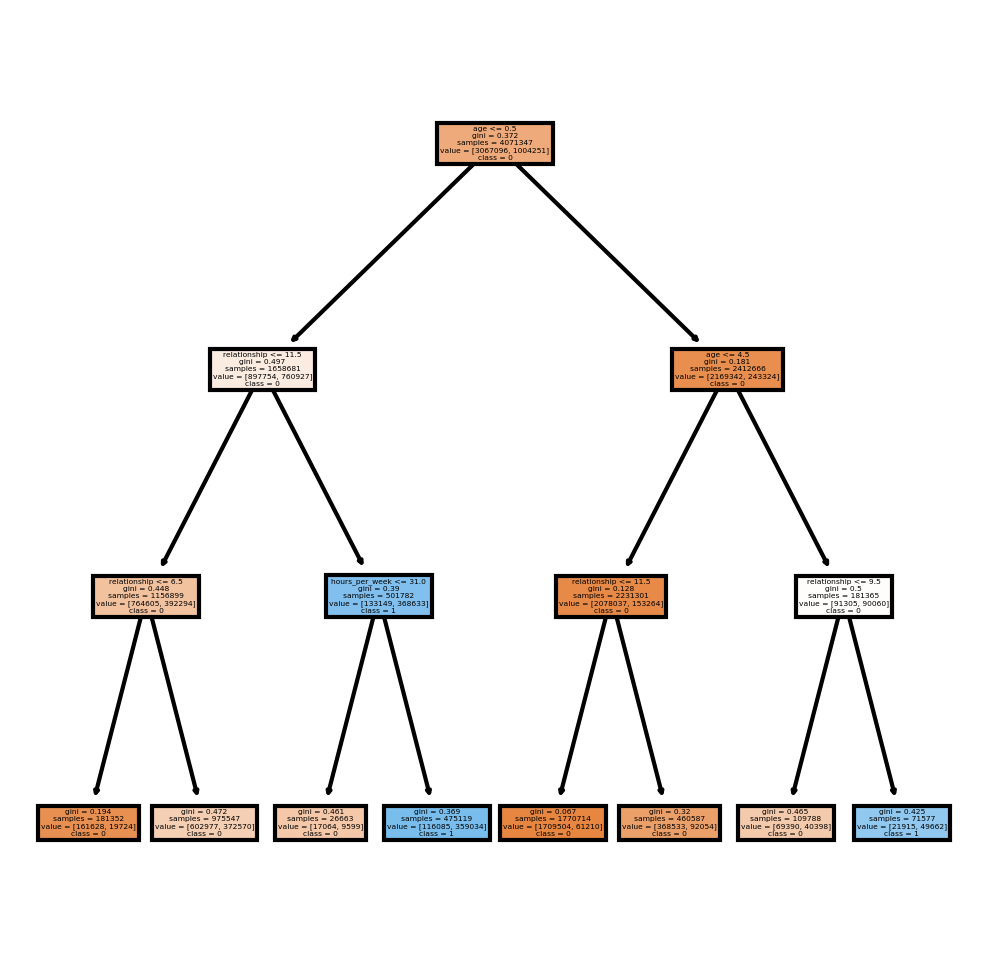

In [62]:
#Q12.2 and Q12.3: Tree Model (CART) Plot of a Tree and Variables Selection

fn = ['education_num', 'relationship', 'age' ,'hours_per_week']
cn = ['0', '1'] 

tree.plot_tree(tree1)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(tree1,
               feature_names = fn, 
               class_names=cn,
               filled = True);
plt.show()


Confusion matrix

 [[1232466   81411]
 [ 210261  220726]]

True Positives(TP) =  1232466

True Negatives(TN) =  220726

False Positives(FP) =  81411

False Negatives(FN) =  210261


<AxesSubplot:>

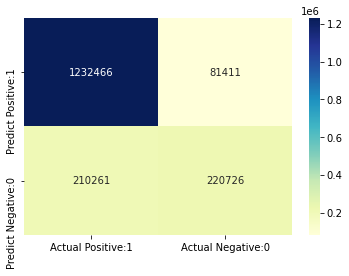

In [67]:
#Q12.4 Tree Model Confusion Table
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm3 = confusion_matrix(y_test, y_pred_rf)

TP3 = cm3[0,0]
TN3 = cm3[1,1]
FP3 = cm3[0,1]
FN3 = cm3[1,0]

print('Confusion matrix\n\n', cm3)

print('\nTrue Positives(TP) = ', cm3[0,0])

print('\nTrue Negatives(TN) = ', cm3[1,1])

print('\nFalse Positives(FP) = ', cm3[0,1])

print('\nFalse Negatives(FN) = ', cm3[1,0])

cm3_matrix = pd.DataFrame(data=cm3, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm3_matrix, annot=True, fmt='d', cmap='YlGnBu')

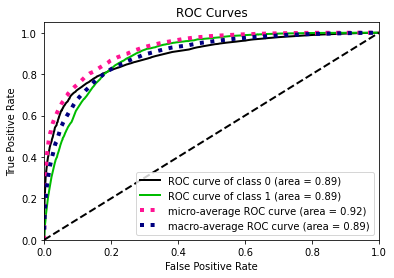

In [68]:
#Q12.4 Tree Model ROC Curve
import matplotlib.pyplot as plt
import scikitplot as skplt

predicted_probas3 = rf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, predicted_probas3)
plt.show()

In [69]:
#Q12.4 Tree Model ROC-AUC


ROC_AUC3 = roc_auc_score(y_test, predicted_probas3[:,1])

print('ROC AUC (Tree Model) : {:.4f}'.format(ROC_AUC3))

ROC AUC (Tree Model) : 0.8918


In [70]:
#Q12.5 Tree Model Metrics
from sklearn.metrics import accuracy_score

misclassification3 = (FP3 + FN3)/float(TP3 + TN3 + FP3 + FN3)
true_positive_rate3 = TP3 / float(TP3 + FN3)
false_positive_rate3 = FP3 / float(FP3 + TN3)
specificity3 = TN3 / (TN3 + FP3)
precision3 = TP3 / float(TP3 + FP3)
prevalence3 = (TP3 + FN3)/float(TP3 + TN3 + FP3 + FN3)
print('Tree Model Metrics:')
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_rf)))
print('Misclassification Rate : {0:0.4f}'.format(misclassification3))
print('Precision : {0:0.4f}'.format(precision3))
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate3))
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate3))
print('Specificity : {0:0.4f}'.format(specificity3))
print('Prevalence : {0:0.4f}'.format(prevalence3))
print('ROC AUC (Tree Model) : {:.4f}'.format(ROC_AUC3))

Tree Model Metrics:
Model accuracy score: 0.8328
Misclassification Rate : 0.1672
Precision : 0.9380
True Positive Rate : 0.8543
False Positive Rate : 0.2695
Specificity : 0.7305
Prevalence : 0.8268
ROC AUC (Tree Model) : 0.8918


In [71]:
#Q13: Compare Models

print('Naïve Bayes Model Metrics:')
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Misclassification Rate : {0:0.4f}'.format(misclassification))
print('Precision : {0:0.4f}'.format(precision))
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
print('Specificity : {0:0.4f}'.format(specificity))
print('Prevalence : {0:0.4f}'.format(prevalence))
print('ROC AUC (Naive Bayes Model) : {:.4f}'.format(ROC_AUC1))


Naïve Bayes Model Metrics:
Model accuracy score: 0.8083
Misclassification Rate : 0.1917
Precision : 0.9180
True Positive Rate : 0.8417
False Positive Rate : 0.3454
Specificity : 0.6546
Prevalence : 0.8212
ROC AUC (Naive Bayes Model) : 0.8298


In [72]:
print('Logit Model Metrics:')
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_log)))
print('Misclassification Rate : {0:0.4f}'.format(misclassification2))
print('Precision : {0:0.4f}'.format(precision2))
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate2))
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate2))
print('Specificity : {0:0.4f}'.format(specificity2))
print('Prevalence : {0:0.4f}'.format(prevalence2))
print('ROC AUC (Logit Model) : {:.4f}'.format(ROC_AUC2))


Logit Model Metrics:
Model accuracy score: 0.7996
Misclassification Rate : 0.2004
Precision : 0.9334
True Positive Rate : 0.8238
False Positive Rate : 0.3413
Specificity : 0.6587
Prevalence : 0.8532
ROC AUC (Logit Model) : 0.8150


In [73]:
print('Random Forest Model Metrics:')
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_rf)))
print('Misclassification Rate : {0:0.4f}'.format(misclassification3))
print('Precision : {0:0.4f}'.format(precision3))
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate3))
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate3))
print('Specificity : {0:0.4f}'.format(specificity3))
print('Prevalence : {0:0.4f}'.format(prevalence3))
print('ROC AUC (Tree Model) : {:.4f}'.format(ROC_AUC3))

Random Forest Model Metrics:
Model accuracy score: 0.8328
Misclassification Rate : 0.1672
Precision : 0.9380
True Positive Rate : 0.8543
False Positive Rate : 0.2695
Specificity : 0.7305
Prevalence : 0.8268
ROC AUC (Tree Model) : 0.8918
